**Základné fyzikálne praktikum I**, Jozef Hanč, PF UPJŠ v Košiciach  
<font size=2> Kópiu tohto notebooku nájdete v [Google učebni](classroom.google.com) v priečinku **Študijné materiály, ťaháky, kontakty**  
Postupne pomocou klávesov `Shift+Enter` vykonajte jednotlivé bloky dokumentu. </font>
***
# <font color=brown> Pojem pravdepodobnosti - Monte Carlo simulácie </font>

Náhodné experimenty vykonávané na počítači boli vymyslené fyzikmi v tajnom projekte Manhattan, čo bol krycí názov pre projekt vývoja atómovej bomby. Tieto experimenty fyzici nazvali *Monte Carlo simulácie* (skr. MC simulácie)
podľa slávneho kasína Monte Carlo v Monacu. Viac si môžete prečítať v texte [Neistoty, pravdepodobnosť a kasíno Monte Carlo](https://docs.google.com/document/d/1_PXdo3by5z5rYFxaKW5msWbhrt3mB_lUYVisYbH_31I/preview).

### Hod kockou - Geogebra
- simuláciu ovládate tlačidlami `hod` - hodiť kockou, `odznova` - spustiť hádzanie kockou odznova
- na začiatku vždy kliknite `odznova`
- posúvaním hnedého bodu možno merať hodnoty pravdepodobnosti v grafe
- simulácia priamo na Geogebra stránke (https://ggbm.at/suqjz5mx)

In [1]:
# stlačením SHIFT+Enter sprístupnite Geogebra simuláciu v Jupyteri 
from IPython.display import IFrame
url="https://www.geogebra.org/material/iframe/id/suqjz5mx/"
IFrame(url, 900,450)

### Hod N kockami naraz - Python
- pomocou $\,\verb|Shift+Enter|\,$ vykonávate jednotlivé bloky príkazov
- pomocou $\,\verb|Ctrl+Enter|\,$ vykonávate daný blok príkazov opakovane
- v druhom bloku meníte len $N = 10^2, 10^3, 10^4, 10^5, 10^6$ hodov

<font size=2>**Pozn.** V Pythone možno zadať napr. 1000 mincí v skrátenom tvare $\,\verb|10**3|\,$, kde 2 znaky násobenia ** (2 hviezdičky z numerickej klávesnice)   
znamenajú umocnenie, t.j. $\,\verb|**3|\,$ znamená umocnenie na tretiu.</font>

In [2]:
# Načítanie knižnice numerický python - numpy, ktorá vie robiť MC simulácie
# knižnici numpy sme dali skrátené meno np
import numpy as np


# hod N kockami naraz - N hodov naraz
N = 100
hody = np.random.randint(1,7,size = N)
rel_pocetnosti = np.bincount(hody)/N*100

# zobrazenie pocetnosti a vygenerovaných hodov (až 1000)
print(rel_pocetnosti[1:])
print(hody[:1000])

[18. 17. 17. 18. 16. 14.]
[5 2 2 5 4 1 1 2 5 5 6 4 4 3 3 4 4 5 4 2 3 2 4 3 2 4 1 6 5 6 6 1 6 4 3 4 3
 1 3 1 6 3 3 3 5 2 6 2 4 2 1 5 1 4 3 1 1 6 3 1 5 2 5 3 2 3 5 2 1 1 2 1 3 6
 4 5 1 5 4 6 4 4 2 1 1 5 6 4 2 2 3 3 4 5 5 6 1 2 6 6]


,hod,relatívna početnosť
0,1,18.0
1,2,17.0
2,3,17.0
3,4,18.0
4,5,16.0
5,6,14.0


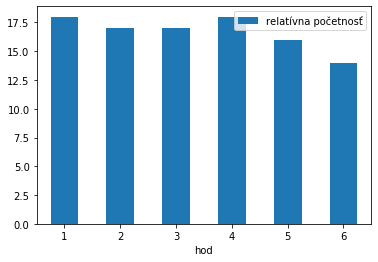

In [4]:
# načítanie knižnice pandas, ktorá vie zobrazovať tabuľky aj základné grafy
import pandas as pd

# číselná a grafická sumarizácia vo forme tabuľky a grafu
tabulka =  pd.DataFrame({'hod':[1,2,3,4,5,6], 'relatívna početnosť':rel_pocetnosti[1:]})
display(tabulka)
stlpcovygraf = tabulka.plot.bar(x='hod', y='relatívna početnosť', rot=0)

# <font color=brown> Vysvetlivky príkazov v Pythone </font>

### **Príkaz**  `np.random.randint(1,7,size = N)`
- $\verb|np|$ - vyberám príkaz z knižnice numpy
- $\verb|random|$ - idem do časti knižnice numpy, ktorá vie robiť náhodné pokusy (*ang. random = náhodný*)
- $\verb|randint|$ - týmto príkazom budem generovať náhodné čísla s rovnakou pravdepodobnoťou  
  a budú to celé čísla (*randint je skratka ang. random integer - náhodné celé čísla*).  
```
parametre príkazu (1,7, size = N) - náhodné celé čísla budú väčšie rovné ako 1 a menšie ako 7, t.j. 1, 2,...,6 a bude ich N
```
- celý príkaz je tak vlastne generovanie čísel 1 až 6 s rovnakou pravdepodobnosťou,  
  čo je to isté ako hod ideálnou kockou.